<a href="https://colab.research.google.com/github/fajarwr/CNN_3D_Permaebility/blob/branch_02/CNN_3D_Permeability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division, print_function, absolute_import
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv3D, MaxPooling3D, BatchNormalization, Input
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, TensorBoard
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
import os
import sys
import matplotlib.pyplot as plt
import re
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
#Define r square matric
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [3]:
cd

/root


In [4]:
cd /content

/content


In [5]:
pwd

'/content'

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
ls

gdrive/  sample_data/


In [0]:
os.chdir('gdrive/My Drive/CNN_Permeability/001_PythonCodes/CNN_3D_Permaebility')

In [0]:
#Import datagenerator taken from 
#https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
from DataGenerator_3D_Classes import DataGenerator

In [0]:
#Experiment number
exp_num = 15
os.chdir('../../005_Result/CNN_3D')
if any('00'+str(exp_num) in s for s in os.listdir(os.getcwd())):
    sys.exit('Alert : There is already 00'+str(exp_num)+' experiment result!!')

In [0]:
#Load the data
dim1,dim2,dim3,chn = 100,100,100,1
training_len = 90
testing_len = 10
total_len = training_len + testing_len
phi = []
ssa = []
os.chdir('../../002_Data/Berea_Sandstone_npy')
for image3D_npy in os.listdir(os.getcwd())[:total_len]:
    phi.append([float(s) for s in re.findall('[-+]?\d*\.\d+|\d+',
                image3D_npy)][1])
    ssa.append([float(s) for s in re.findall('[-+]?\d*\.\d+|\d+',
                image3D_npy)][2])
k = np.power(1-np.array(phi), 3)/np.power(ssa, 2)
k_norm = k/np.max(k)

In [0]:
# Parameters
params = {'dim': (dim1,dim2,dim3),
          'batch_size': 20,
          'n_classes': 1,
          'n_channels': chn,
          'shuffle': False}

In [0]:
#Datasets
partition = {
		'train': os.listdir(os.getcwd())[:training_len],
		'validation': os.listdir(os.getcwd())[training_len:total_len],
        'total' : os.listdir(os.getcwd())[:total_len]
		}
labels = dict(zip(os.listdir(os.getcwd())[:total_len], k_norm))

In [0]:
# Generators
training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)
total_generator = DataGenerator(partition['total'], labels, **params)

In [15]:
#Define a model
model = Sequential()
model.add(Conv3D(64, kernel_size=5, strides=(2, 2, 2), padding='valid',
                 data_format='channels_last', dilation_rate=(1, 1, 1),
                 activation='relu', use_bias=True,
                 kernel_initializer='glorot_uniform', bias_initializer='zeros',
                 kernel_regularizer=None, bias_regularizer=None, 
                 activity_regularizer=None, kernel_constraint=None,
                 bias_constraint=None, input_shape=(dim1, dim2, dim3, chn)))
model.add(Conv3D(64, kernel_size=3, strides=(1, 1, 1), padding='valid',
                 data_format='channels_last', dilation_rate=(1, 1, 1),
                 activation='relu', use_bias=True,
                 kernel_initializer='glorot_uniform', bias_initializer='zeros',
                 kernel_regularizer=None, bias_regularizer=None, 
                 activity_regularizer=None, kernel_constraint=None,
                 bias_constraint=None))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 1, 1), padding='valid',
                       data_format='channels_last'))
model.add(Conv3D(64, kernel_size=3, strides=(1, 1, 1), padding='valid',
                 data_format='channels_last', dilation_rate=(1, 1, 1),
                 activation='relu', use_bias=True,
                 kernel_initializer='glorot_uniform', bias_initializer='zeros',
                 kernel_regularizer=None, bias_regularizer=None, 
                 activity_regularizer=None, kernel_constraint=None,
                 bias_constraint=None))
model.add(Conv3D(64, kernel_size=3, strides=(1, 1, 1), padding='valid',
                 data_format='channels_last', dilation_rate=(1, 1, 1),
                 activation='relu', use_bias=True,
                 kernel_initializer='glorot_uniform', bias_initializer='zeros',
                 kernel_regularizer=None, bias_regularizer=None, 
                 activity_regularizer=None, kernel_constraint=None,
                 bias_constraint=None))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 1, 1), padding='valid',
                       data_format='channels_last'))
model.add(Flatten(data_format='channels_last'))
model.add(Dense(128, activation='relu', use_bias=True,
                kernel_initializer='glorot_uniform', bias_initializer='zeros',
                kernel_regularizer=None, bias_regularizer=None,
                activity_regularizer=None, kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(128, activation='relu', use_bias=True,
                kernel_initializer='glorot_uniform', bias_initializer='zeros',
                kernel_regularizer=None, bias_regularizer=None,
                activity_regularizer=None, kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(64, activation='relu', use_bias=True,
                kernel_initializer='glorot_uniform', bias_initializer='zeros',
                kernel_regularizer=None, bias_regularizer=None,
                activity_regularizer=None, kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(1, activation=None, use_bias=True,
                kernel_initializer='glorot_uniform', bias_initializer='zeros',
                kernel_regularizer=None, bias_regularizer=None,
                activity_regularizer=None, kernel_constraint=None,
                bias_constraint=None))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[r2_keras],
              loss_weights=None, sample_weight_mode=None,weighted_metrics=None,
              target_tensors=None)

In [0]:
#This checkpoint object will store the model parameters in the file "weights.hdf5"
checkpoint = ModelCheckpoint(filepath='../../../../../Weights_CNN3D_00'+str(exp_num)+'.hdf5', monitor='val_loss')

In [0]:
#Change to data directory
os.chdir('../../002_Data/Berea_Sandstone_npy')

In [20]:
# Train model on dataset
history = model.fit_generator(generator=training_generator, epochs=20,
                    callbacks=[checkpoint], workers=-1, use_multiprocessing=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20


ResourceExhaustedError: ignored

In [0]:
#Save history
history_df = pd.DataFrame.from_dict(history.history)
history_df.to_excel('../../005_Result/CNN_3D/History_CNN3D_00'+str(exp_num)+'.xlsx')

In [0]:
#Load the model and plot the data
model.load_weights('../../../../../Weights_CNN3D_00'+str(exp_num)+'.hdf5')

In [0]:
#Store the training & testing result
total_result = model.predict_generator(generator=total_generator, steps=None,
                                  max_queue_size=10, workers=-1,
                                  use_multiprocessing=True, verbose=0)

In [0]:
#Save result
training_result = {
		'true_training': np.reshape(k_norm[:training_len]*np.max(k),(training_len,)),
		'pred_training': np.reshape(total_result[:training_len]*np.max(k),(training_len,))
		}
testing_result = {
        'true_testing': np.reshape(k_norm[training_len:total_len]*np.max(k),(testing_len,)),
		'pred_testing': np.reshape(total_result[training_len:total_len]*np.max(k),(testing_len,))
        }
training_result_df = pd.DataFrame.from_dict(training_result)
testing_result_df = pd.DataFrame.from_dict(testing_result)
training_result_df.to_excel('../../005_Result/CNN_3D/Training_CNN3D_00'+
                            str(exp_num)+'_'+str(r2_score (k_norm[:training_len]*np.max(k), total_result[:training_len]*np.max(k)))+'.xlsx')
testing_result_df.to_excel('../../005_Result/CNN_3D/Testing_CNN3D_00'+
                           str(exp_num)+'_'+str(r2_score(k_norm[training_len:total_len]*np.max(k), total_result[training_len:total_len]*np.max(k)))+'.xlsx')

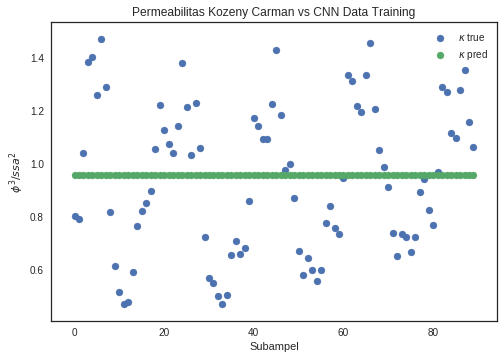

In [24]:
#Plot the training data
plt.figure()
plt.scatter(np.arange(0,training_len),k_norm[:training_len]*np.max(k), label='$\kappa$ true')
plt.scatter(np.arange(0,training_len),total_result[:training_len]*np.max(k), label='$\kappa$ pred')
plt.title('Permeabilitas Kozeny Carman vs CNN Data Training')
plt.xlabel('Subampel')
plt.ylabel('$\phi^3/ssa^2$')
plt.legend()

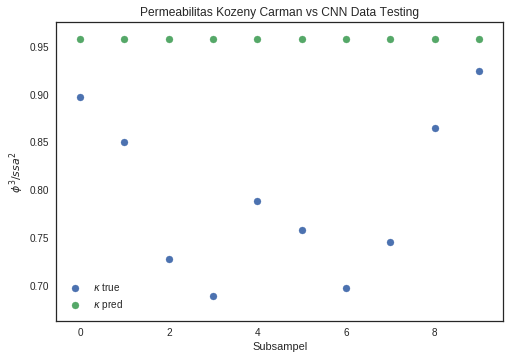

In [25]:
#Plot the testing data
plt.figure()
plt.scatter(np.arange(0,testing_len),k_norm[training_len:total_len]*np.max(k), label='$\kappa$ true')
plt.scatter(np.arange(0,testing_len),total_result[training_len:total_len]*np.max(k), label='$\kappa$ pred')
plt.title('Permeabilitas Kozeny Carman vs CNN Data Testing')
plt.xlabel('Subsampel')
plt.ylabel('$\phi^3/ssa^2$')
plt.legend()

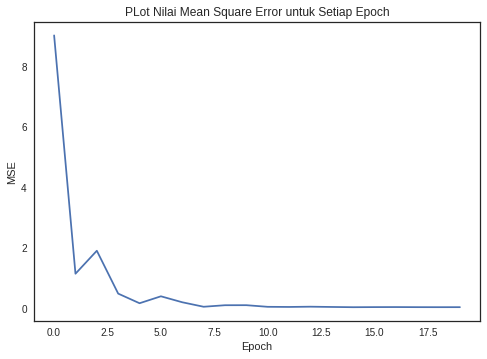

In [26]:
#PLot history MSE
plt.figure()
plt.plot(history.history['loss'])
plt.title('PLot Nilai Mean Square Error untuk Setiap Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

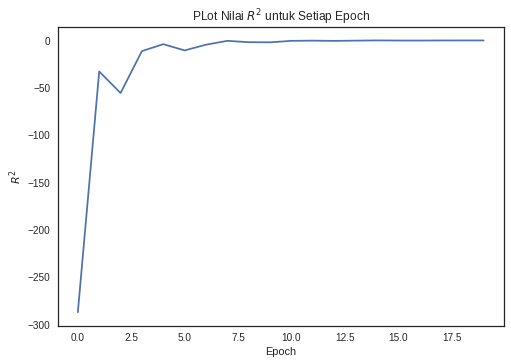

In [27]:
#Plot history r2_keras
plt.figure()
plt.plot(history.history['r2_keras'])
plt.title('PLot Nilai $R^2$ untuk Setiap Epoch')
plt.xlabel('Epoch')
plt.ylabel('$R^2$')
plt.show()